In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Models

While it is very easy to use machine learning models as a black box, understanding how a model works can allow one to better choose an algorithm and design better hyperparameters.

## The Linear Regression Model

### Intro

The linear regression model is written as follows

$$\hat{y} = h_\theta (\mathbf{x}) = \theta_T \cdot \mathbf{x} $$

where $\hat{y}$ is an estimator of some outcome, $\mathbf{x}$ is the instances **feature vector** and $\theta$ is the models **parameter vector**. For example $\hat{y}$ might be the weight of a person on $\mathbf{x}$ might be $x_1=\text{height}$ and $x_2=\text{age}$. Note that $x_0=1$ (must add this in to estimate constant term).

$\theta$ is obtained by looking at data. A good model, for example, should have $\hat{y}$ and $\theta_T \cdot \mathbf{x}$ as close together as possible for all the data provided. One measurement for *closeness* is the MSE function

$$\text{MSE}(\mathbf{X}, h_\theta) = \frac{1}{m}\sum_i (\theta_T \cdot \mathbf{x}^{(i)} - y^{(i)}) $$

where the index $i$ specifies the ith data point provided. It can be shown (see Logbook August 25 2019 for proof) that the value of $\theta$ which minimizes this is

$$\hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$

where $$\mathbf{X} = \begin{bmatrix} \mathbf{x}^{(1), T} \\
\mathbf{x}^{(2), T} \\
...\\
\mathbf{x}^{(m), T} \\
\end{bmatrix} $$

note that $\hat{\theta}$ is an *estimator* since it is obtained using a subsample of some population.

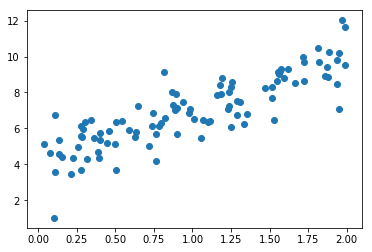

In [2]:
x = 2 * np.random.rand(100,1) # select a bunch of random features
y  = 4 + 3 * x + np.random.randn(100,1) # add randomness to model
plt.scatter(x.ravel(),y.ravel())

Its easy to compute $\hat{\theta}$. First we need to add in $x_0=1$

In [3]:
X_b = np.c_[np.ones((100,1)), x]

Now we use the closed form solution to approximate $\hat{\theta}$.

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.15315508],
       [2.84194751]])

Note that they should actually be 3 and 4. Now we can make predictions.

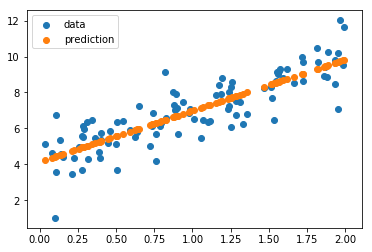

In [5]:
theta_best = theta_best.ravel()
y_predict = theta_best[0]+theta_best[1]*x
plt.scatter(x,y, label='data')
plt.scatter(x,y_predict,label='prediction')
plt.legend()
plt.show()

### Scikit Learn Method

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([4.15315508]), array([[2.84194751]]))

### Computational Complexity

Computing the inverse of $\mathbf{X}^T \mathbf{X}$ is typically about $O(n^{2.4})$ to $O(n^3)$ where $n$ *is the number of features*. Thus this algorithm is slow when the number of features gets very big. On the positive side, it is only linear with respect to the number of instances (training data points) so the algorithm is $O(m)$.

## Gradient Descent

*General Idea:* tweak parameters iteratively in order to minimize a cost function. For the linear model above, this can be accomplished by filling $\theta$ with random alus initially and then gradually take steps until the algorithm converges to a minimum.

**Learning Rate**: The size of the steps. Too low and it takes too long. Too high and you migh over jump the minima.

Main problem with gradient descent is that it can sometimes converge to a local minima and not a global minima (in the case of the linear regression above, global minima=local minima but this is not always the case).

*Important*: When using gradient descent with scikit learn its important that a standard scaler is used so that all features have a similar scale. Otherwise things will take too long to converge.

### Batch Gradient Descent

Its easy to show that

$$ \nabla_\theta \text{MSE}(\theta) = \frac{2}{m}\mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - \mathbf{y})$$

When using batch gradient descent the steps are defined by

$$ \theta^{\text{(next step)}} = \theta-\eta\nabla_\theta \text{MSE}(\theta) $$

Note that this takes into account the entire training set.

In [8]:
eta1 = 0.1
eta2 = 0.02
eta3 = 0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # start with random theta

def compute_thetas(theta, eta, n_iterations):
    thetas = []
    for iteration in range(n_iterations):
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradient  
        thetas.append(theta)
    return np.array(thetas)

thetas_eta1 = compute_thetas(theta, eta1, n_iterations)
thetas_eta2 = compute_thetas(theta, eta2, n_iterations)
thetas_eta3 = compute_thetas(theta, eta3, n_iterations)

Visualization of how fast parameters converge.

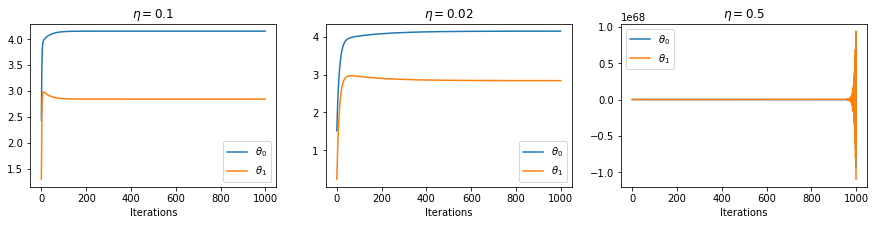

In [9]:
fig, ax = plt.subplots(1,3,figsize=(15,3))

ax[0].plot(thetas_eta1[:,0].ravel(), label=r'$\theta_0$')
ax[0].plot(thetas_eta1[:,1].ravel(), label=r'$\theta_1$')
ax[1].plot(thetas_eta2[:,0].ravel(), label=r'$\theta_0$')
ax[1].plot(thetas_eta2[:,1].ravel(), label=r'$\theta_1$')
ax[2].plot(thetas_eta3[:,0].ravel(), label=r'$\theta_0$')
ax[2].plot(thetas_eta3[:,1].ravel(), label=r'$\theta_1$')

ax[0].set_title('$\eta=0.1$')
ax[1].set_title('$\eta=0.02$')
ax[2].set_title('$\eta=0.5$')

[a.set_xlabel('Iterations') for a in ax.ravel()]
[a.legend() for a in ax.ravel()]
plt.show()

$\eta=0.1$ converges well, $\eta=0.02$ takes a little longer, and $\eta=0.5$ has trouble converging at first (lots of overshooting).

A good way to know when to stop doing more iterations (implemented in many machine learning packages) is to stop when the norm of the gradient vector becomes smaller than some value contained in the code $\epsilon$ known as the **tolerance**.

### Stochastic Gradient Descent

The problem with batch gradient descent is that it uses the entire training set at every iteration of $\theta$. At an opposite extreme, stochastic gradient descent picks a random instance in the training set at every iteration and uses that for computation.

Because this process is stochastic (random) the cost function bounces up and down, and will never quite converge to an optimal value of $\theta$. When the cost function is very irregular and has seperate local and global minima, this bouncing around nature can actually help jump out of local minima and find the true global minima.

Randomness: **Good** b/c helps escape local minima, **bad** because never quite settles on a minima.

The main solution to this is to reduce the learning rate gradually over time so that the algorithm can settle at a global minima. This process is called **simulated annealing**. (Isomorphic to annealing in metalurgy where molten metal is slowly colled down).

In [10]:
thetas= []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        thetas.append(theta)  
        
thetas = np.array(thetas)

We iterate in rounds of $m$ iterations. Each round is called an **epoch**. For each epoch we do $m$ iterations. After each epoch we change the value of $\eta$.

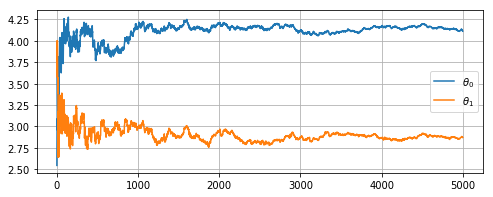

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,3))
ax.plot(thetas[:,0].ravel(), label=r'$\theta_0$')
ax.plot(thetas[:,1].ravel(), label=r'$\theta_1$')
ax.grid()
ax.legend()
plt.show()

### Mini-batch Gradient Descent


Mini-batch computes the gradients based on random sets of instances called **mini-batches**. The algorithms progress in parameter space is less erratic than SGD, but its harder for the algorithm to escape from local minima. 

## Polynomial Regression

Surprsingy, a linear model can actaully be used to fit non-linear data. This involves adding powers of each feature as new features and then training the linear model on this extended set of features.

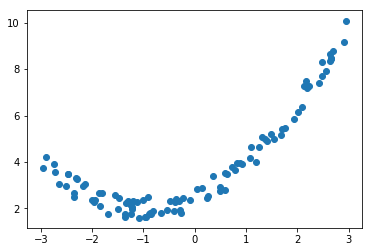

In [14]:
m = 100
X = 6 * np.random.rand(m,1) - 3 # normally distributed between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)
plt.scatter(X,y)

Now we use scikit learns PolynomialFeatures to add $X^2$ as a new feature.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [20]:
print(X_poly[0:3])

[[ 2.01039567  4.04169076]
 [ 2.56413108  6.57476821]
 [-0.80468514  0.64751818]]


Note that X_poly now contains the linear and quadratic term. Now we can apply a fit

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.471728]), array([[0.96887666, 0.5006298 ]]))

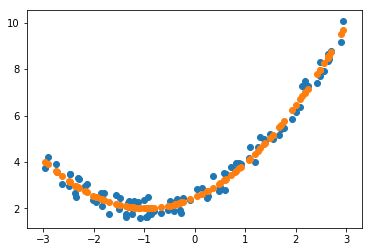

In [29]:
plt.scatter(X,y, label='Data')
plt.scatter(X, lin_reg.predict(X_poly).ravel(), label='Prediction')

Note that Polynomial Features doew neat things for multiple features: if we had features $X_1$ and $X_2$ and we specified degree=3, we would also get $X_1X_2^2$ and $X_2X_1^2$ (combinations of features).

Of course its also possible to overfit the data. Suppose we use a much higher order polynomial.

In [72]:
poly_bad_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly_bad = poly_bad_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_bad, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
x = np.arange(-3,3,0.01); x = np.reshape(x, (-1, 1))
x_r = poly_bad_features.fit_transform(x)

(0, 10)

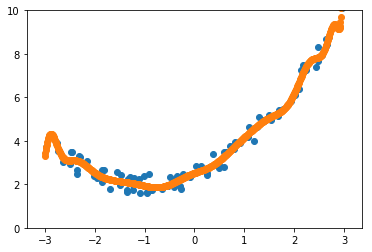

In [74]:
plt.scatter(X,y)
plt.scatter(x.ravel(), lin_reg.predict(x_r).ravel())
plt.ylim(0,10)

Now it appears to be overfitting the noise.

**In general, how can you tell if a model is overfitting or underfitting data**? If a model performs well on a training set but generalizes poorly according to cross-validation, then the model is overfitting. If it performs poorly on both, then it is underfitting. Another way is to look at **learning curves**. These are plots of the model's performance on a validation set using a test set of varying sizes. To generate these plots one simply needs to train a model several times on different sized subsets.

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', lw=2, label='Train')
    plt.plot(np.sqrt(val_errors), 'b-', lw=3, label='Validation')
        

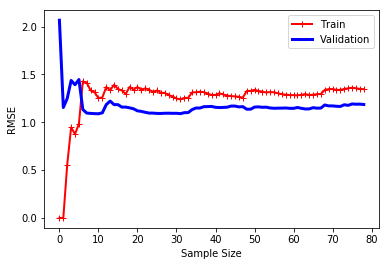

In [84]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.legend()

When there are just 1 or 2 instances in the training set, the model can fit the data perfectly; this is why the RMSE starts at zero. But as new instances are created, the model can not fit all data perfectly (errors when drawing line through 3 points). For the validation set, when the sample size in the training set is small, the model is incapable of generalizing to many instances. Recall that we are training a linear model on a quadratic curve; this is why the RMSE eventually plateaus to a relatively high value.